<a href="https://colab.research.google.com/github/karemgerges/CNN-CIFAR10-Classifier/blob/master/CV_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

# Plot funciton

In [0]:
def plot_data(num_epochs, kernels, accuracies):
  y_pos = np.arange(len(accuracies))
  plt.bar(y_pos, accuracies, align='center', alpha=0.5)
  plt.xticks(y_pos, kernels)
  plt.ylabel('Accuracy')
  title = 'Number of Epochs = {}'.format(num_epochs)
  plt.title(title)
  plt.show(True)

#Loading CIFAR10

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

0it [00:00, ?it/s]

100%|█████████▉| 170385408/170498071 [01:02<00:00, 2079490.43it/s]

Files already downloaded and verified


#Define a Convolutional Neural Network

In [0]:
class Net(nn.Module):
       
    def __init__(self,kernel_size):
        # 3 input image channel, 6 output channels, kernel_size * kernel_size
        # square convolution kernel
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size)
        # Max pooling over a (2, 2) window
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size)
        # fully connected takes nn.Linear(size of input, size to output)
        fc1_input_size = self.calculate_fc1_input_size(kernel_size, num_conv_layers=2)
        #print('size is :' ,self.fc1_input_size)
        self.fc1 = nn.Linear(16 * fc1_input_size * fc1_input_size, 120)
        self.fc2 = nn.Linear(120, 84)
        # 10 = number of classes we are classifing to
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
      
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
      
    def calculate_fc1_input_size(self, kernel_size, num_conv_layers):
        image_single_dim = 32
        val = image_single_dim
        kernel_sub = (kernel_size - 1)
        for i in range(num_conv_layers):
          val = int((val - kernel_sub) / 2)
        return val

#Training Function

In the neural network terminology:
* **one epoch** = *one forward pass and one backward pass* of all the training examples

* **batch size** = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.

* **number of iterations** = number of passes, each pass using number of examples. To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes).

Example: if you have 1000 training examples, and your batch size is 500, then it will take 2 iterations to complete 1 epoch.

[Quora Link](https://www.quora.com/What-is-the-difference-between-iterations-and-epochs-in-Convolution-neural-networks)


In [0]:
def train(epochs):
  for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:
            running_loss = 0.0

#Testing Function

In [0]:
def test():
  correct = 0
  total = 0
  with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    return int(((100 * correct) / total))

#Run CNN

In [74]:
kernels = [3, 5, 7]
for epochs in range(3,11,2):
  accuracies = list()
  print('#epochs = ', epochs)
  print('{')
  for kernel_size in kernels:
    print('\tkernel size = ', kernel_size)
    net = Net(kernel_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    train(epochs)
    accuracy = test()
    accuracies.append(accuracy)
    print('\tAccuracy of the network on the 10000 test images = {}%'.format(accuracy))
    print()
  print('}')
  print()
  plot_data(epochs, kernels, accuracies)

#epochs =  3
{
	kernel size =  3


NameError: ignored

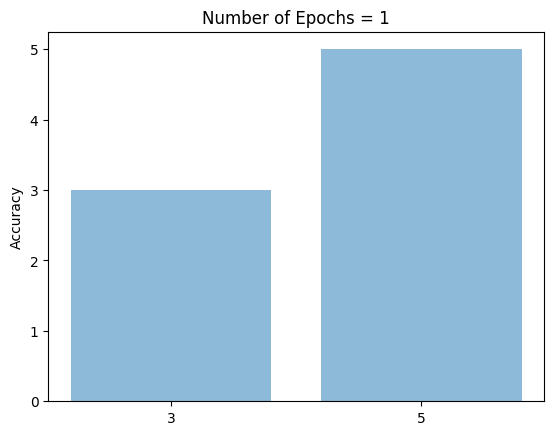

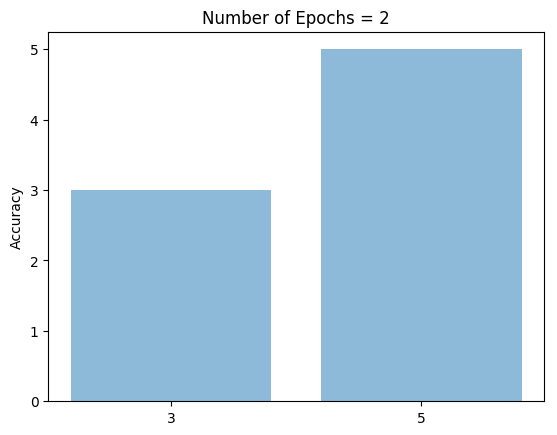

In [86]:
for epochs in range(1,3):
  kernels = [3, 5, 7]
  accuracies = list()
  accuracies.append(3)
  accuracies.append(5)
  plot_data(epochs, kernels, accuracies)